# **CLASSIFICATION**

In [ ]:
%pwd

'/home/mln/GIT/DataScientest/2_PROJECT'

In [ ]:
'''
import pickle
import pandas as pd
file_path = "/home/mln/GIT/large_files/c02_fr&al_21_v04_ludo.pkl"


# Convert the loaded data to a DataFrame
df = pd.read_pickle(file_path)
'''

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')
# Première lecture du JDD

import pandas as pd

df = pd.read_pickle('/content/gdrive/My Drive/ROOT/Dataset/c02_fr&al_21_v04_ludo.pkl')


Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import shap

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


Ce code accomplit plusieurs choses :

pd.set_option('display.max_columns', None) et pd.set_option('display.max_rows', 100) : Ces lignes utilisent des fonctionnalités de Pandas pour définir les options d'affichage. Elles modifient les paramètres pour permettre l'affichage de toutes les colonnes (sans troncature) et limitent l'affichage à 100 lignes maximum dans une cellule ou un tableau.

from sklearn.model_selection import train_test_split, from sklearn.tree import DecisionTreeClassifier, from sklearn.ensemble import RandomForestClassifier : Ces lignes importent des classes ou des fonctions spécifiques de la bibliothèque scikit-learn (sklearn).

train_test_split est utilisé pour diviser les données en ensembles d'entraînement et de test.
DecisionTreeClassifier et RandomForestClassifier sont des algorithmes de classification basés sur les arbres de décision et les forêts aléatoires respectivement.
import warnings warnings.simplefilter(action='ignore', category=FutureWarning) : Cette partie importe le module warnings et configure le filtrage pour ignorer les avertissements de type FutureWarning. Cela peut être utile lorsque des avertissements spécifiques sont jugés non critiques pour l'exécution du code.

In [ ]:
#df = pd.read_pickle('c02_fr&al_21_v03.pkl')
#df.head()

In [ ]:
target = df['Co2Grade']
data = df.drop(['Co2', 'Co2Grade', 'FuelConsumption'], axis=1)

data.head()

,CategoryOf,MassRunningOrder,EngineCapacity,EnginePower,InnovativeTechnology,InnovativeEmissionsReductionWltp,ElectricRange,Pool_BMW,Pool_FORD,Pool_HYUNDAI,...,Pool_VOLKSWAGEN,Pool_VW-SAIC,Fuel_DIESEL,Fuel_DIESEL/ELECTRIC,Fuel_ETHANOL,Fuel_LPG,Fuel_NATURALGAS,Fuel_NG,Fuel_PETROL,Fuel_PETROL/ELECTRIC
196,0,1245.0,1199.0,74.0,1,1.3,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
197,0,1245.0,1199.0,74.0,1,1.3,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
200,0,1245.0,1199.0,74.0,1,1.3,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
201,0,1245.0,1199.0,74.0,1,1.3,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
202,0,1245.0,1199.0,74.0,1,1.3,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
target.head()

196    C
197    C
200    C
201    C
202    C
Name: Co2Grade, dtype: category
Categories (7, object): ['A' < 'B' < 'C' < 'D' < 'E' < 'F' < 'G']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.2, random_state=42)

Ce code utilise la fonction train_test_split de la bibliothèque scikit-learn pour diviser les données en ensembles d'entraînement et de test, généralement utilisés dans le cadre de l'apprentissage supervisé où vous avez des variables indépendantes (data dans ce cas) et une variable cible (target).

Voici ce que chaque partie signifie :

data : C'est le jeu de données contenant les caractéristiques (variables indépendantes) que vous utiliserez pour entraîner votre modèle.
target : C'est la variable cible que vous essayez de prédire ou de modéliser.
La fonction train_test_split divise ces données en quatre parties distinctes :

X_train : C'est la partie du jeu de données data qui sera utilisée pour entraîner votre modèle.
X_test : C'est la partie du jeu de données data qui sera utilisée pour tester la performance de votre modèle, une fois qu'il est entraîné.
y_train : C'est la partie de la variable cible (target) correspondant aux données d'entraînement (X_train).
y_test : C'est la partie de la variable cible (target) correspondant aux données de test (X_test).
Les arguments utilisés dans la fonction train_test_split sont :

test_size=.2 : Il s'agit de la proportion des données qui seront attribuées à l'ensemble de test. Ici, 20% des données sont réservées pour le test.
random_state=42 : Cet argument fixe la graine aléatoire pour garantir la reproductibilité. En utilisant la même valeur (42 dans ce cas), les résultats de la division seront les mêmes à chaque exécution du code.
En somme, cette ligne de code crée quatre ensembles de données : un ensemble d'entraînement pour les caractéristiques (X_train), un

In [ ]:
def plot_confusion_matrix(y_true, y_pred, cmap='Blues', title=''):
    cm = confusion_matrix(y_true, y_pred)
    classes = range(0, 10)
    plt.figure(figsize=(6,6))

    sns.set_style("whitegrid", {"axes.grid": False})
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, labels=classes)
    plt.yticks(tick_marks, labels=classes)
    img = plt.imshow(cm, cmap=cmap, interpolation='nearest')
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
        horizontalalignment='center',
        verticalalignment='center',
        color='white' if cm[i,j] > cm.max() / 2 else 'black')

    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')
    plt.title(f"Matrice de confusion {title}")
    plt.show()

## **DECISION TREES**

On initialise un objet de la classe `DecisionTreeClassifier`.  
Il y aura une profondeur maximum de 20 branches, car c'est la valeur opimale du rapport performances / puissance de calcul.
L'arbre de décision est ensuite entraîné sur les données d'entraînement, puis sa performance est évaluée sur le jeu de test.  

Les performances sont bonnes, avec une accuracy de 94% et les prévisions des classes sont plutôt bien équilibrées.
On a en effet un score f1 réparti entre 92% et 100%.  
Nous gardons en en tête que les performances des arbres de décisions peuvent démontrer un problème de surajustement sous-jacent (overfitting).  
Nous allons donc devoir le comparer à d'autres modèles.

In [ ]:
%%time
dtc = DecisionTreeClassifier(criterion='gini', max_depth=20)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00    150043
           B       0.92      0.95      0.93    249256
           C       0.95      0.93      0.94    471541
           D       0.91      0.92      0.92    223403
           E       0.95      0.94      0.94    113519
           F       0.96      0.96      0.96     43608
           G       0.98      0.96      0.97     12845

    accuracy                           0.94   1264215
   macro avg       0.95      0.95      0.95   1264215
weighted avg       0.94      0.94      0.94   1264215



On va étudier l'ordre d'importance de nos features.  
Sur plusieurs essais, l'importance des caractéristiques `"EnginePower"` et `"MassRunningOrder"` dominent nettement pour la classification par arbre de décision

In [ ]:
feats = {}
for feature, importance in zip(data.columns, dtc.feature_importances_):
    feats[feature] = importance

importances  = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0:'importance'})
importances = importances.sort_values(by='importance', ascending=False)
importances

,importance
EnginePower,0.317884
MassRunningOrder,0.270782
ElectricRange,0.159556
EngineCapacity,0.092493
InnovativeEmissionsReductionWltp,0.058181
Fuel_PETROL,0.019861
Pool_BMW,0.016652
Fuel_DIESEL,0.013964
Pool_MAZDA-SUBARU-SUZUKI-TOYOTA,0.007443
Pool_RENAULT-NISSAN-MITSUBISHI,0.007228


Voici le cheminement logique des 2 premières étapes logiques depuis le noyau. L'arbre commence par trier les véhicules par leur autonomie du moteur électrique (hybrides), puis par la puissance du moteur.  
On remarque que le coefficient gini passe à des valeurs quasi nulles sur la branche de droite, l'arbre peut en effet trouver la note des véhicules hybrides avec quasi-certitude dès le 2ème niveau de choix logiques.

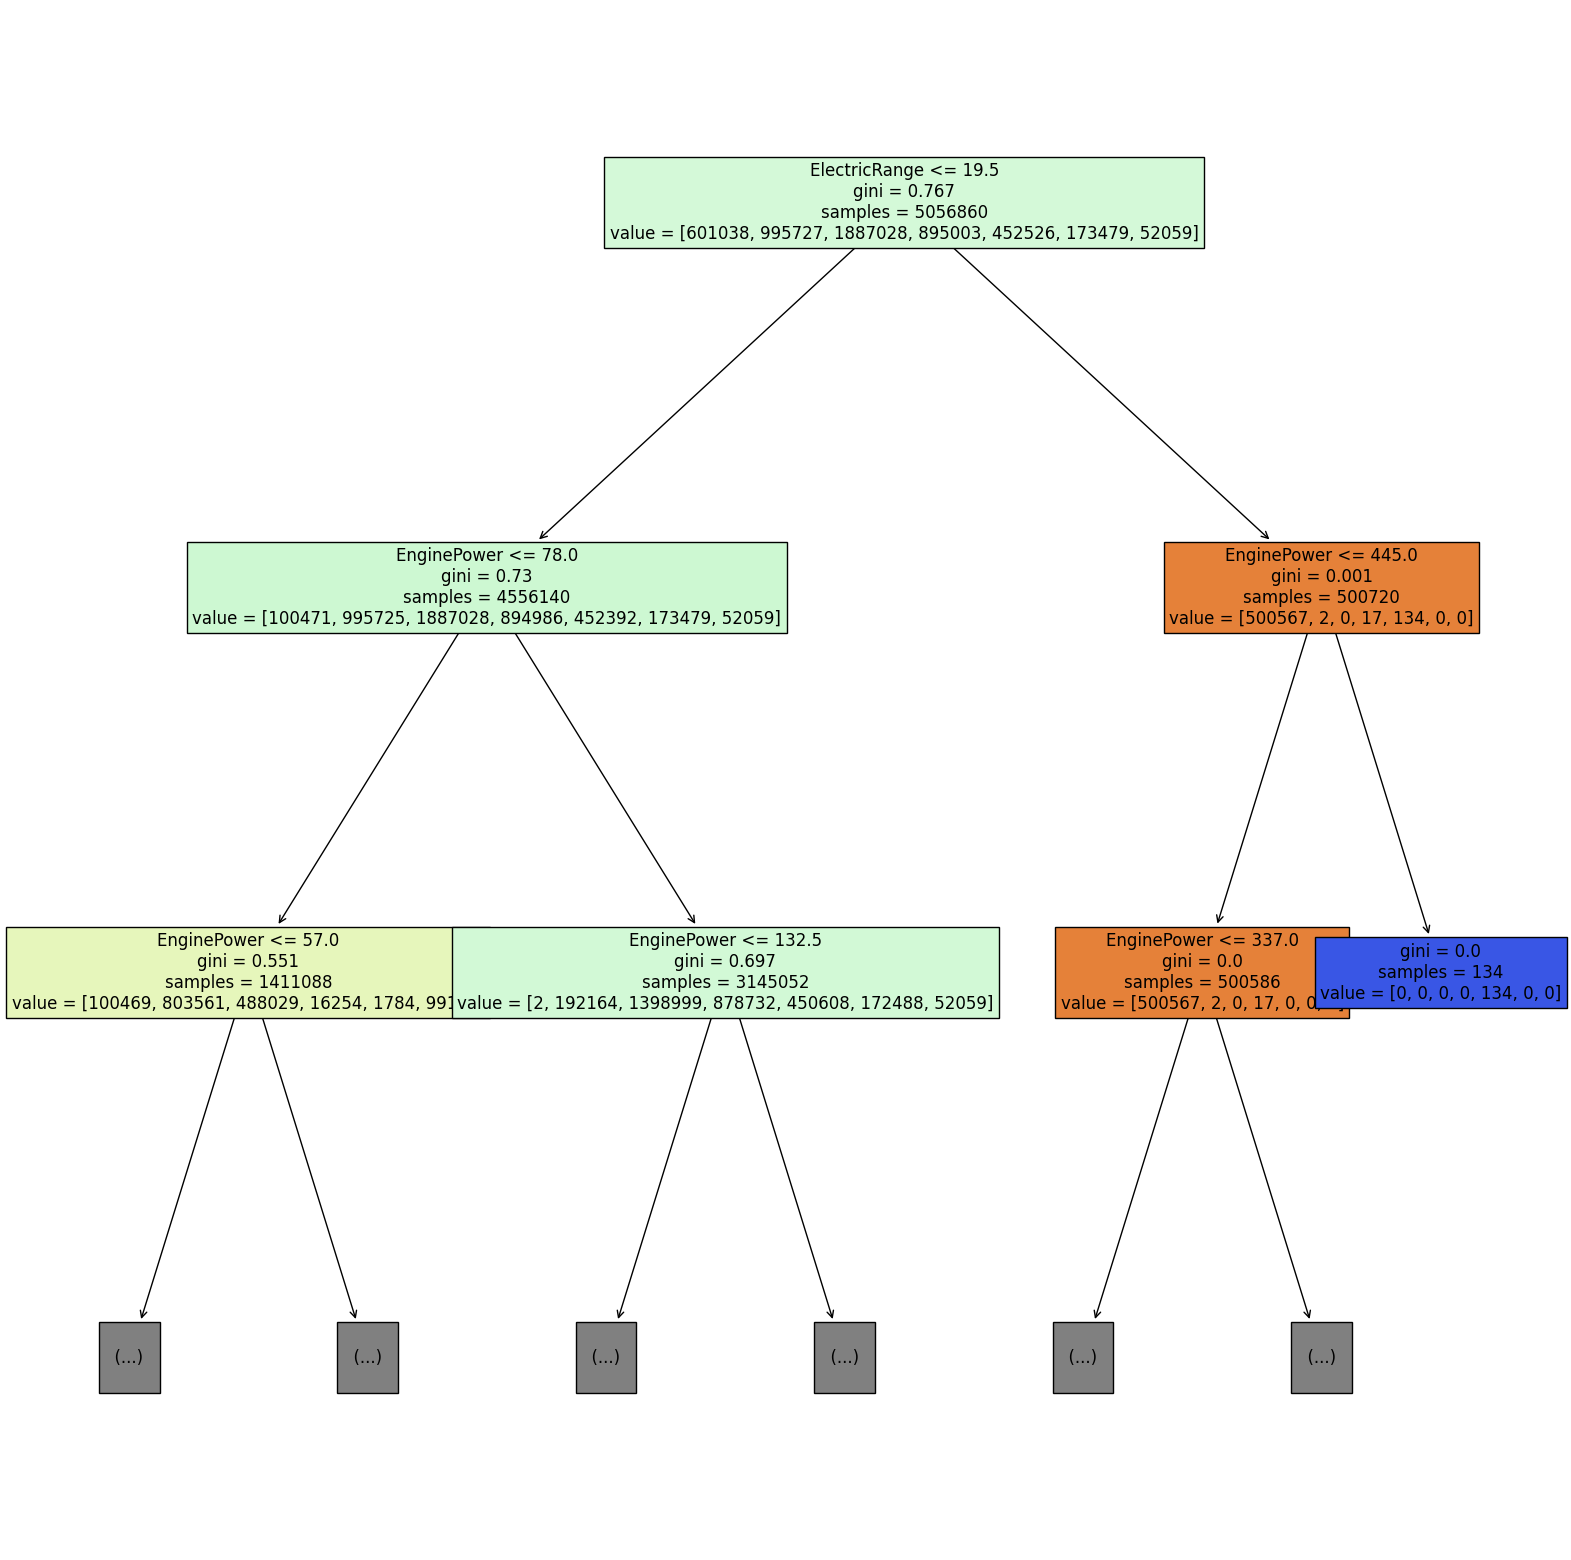

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))

plot_tree(dtc, feature_names=X_train.columns.tolist(),
          max_depth=2, filled=True, fontsize=12);

## **RANDOM FOREST**

Les résultats du décision tree montrent que les modèles logiques vont donner de bons, nous allons donc essayer un modèle logique plus élaboré, avec un algorithme de Random Forest.  

Les performances sont similaires, mais le temps d'exécution est sensiblement plus long.
Ce désavantage doit être nuancé par le fait que les performances de modèles de forêt aléatoire sont généralement plus robustes que les arbres de décisions quand ils sont confrontés à de nouvelles données.  

In [ ]:
%%time
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00    150043
           B       0.92      0.95      0.93    249256
           C       0.95      0.93      0.94    471541
           D       0.92      0.92      0.92    223403
           E       0.95      0.94      0.94    113519
           F       0.96      0.97      0.96     43608
           G       0.98      0.96      0.97     12845

    accuracy                           0.94   1264215
   macro avg       0.95      0.95      0.95   1264215
weighted avg       0.94      0.94      0.94   1264215

CPU times: user 37min 3s, sys: 38.9 s, total: 37min 42s
Wall time: 2min 58s


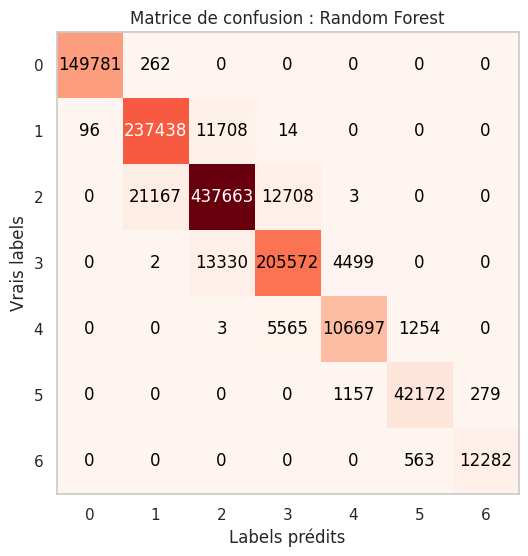

In [ ]:
plot_confusion_matrix(y_test, rfc_pred, "Reds", ": Random Forest")

In [ ]:
feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance

importances  = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0:'importance'})
importances['importance'] *= 100
importances = importances.sort_values(by='importance', ascending=False)
importances

,importance
MassRunningOrder,32.111036
EnginePower,20.459904
EngineCapacity,10.613107
InnovativeEmissionsReductionWltp,9.580963
ElectricRange,7.509434
Fuel_PETROL/ELECTRIC,5.000177
Fuel_PETROL,2.484046
Fuel_DIESEL,2.316176
InnovativeTechnology,1.546877
CategoryOf,1.224113


## **Réduction de dimensions PCA appliquée sur un modèle Random Forest**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(data_pca, target, test_size=.2, random_state=42)

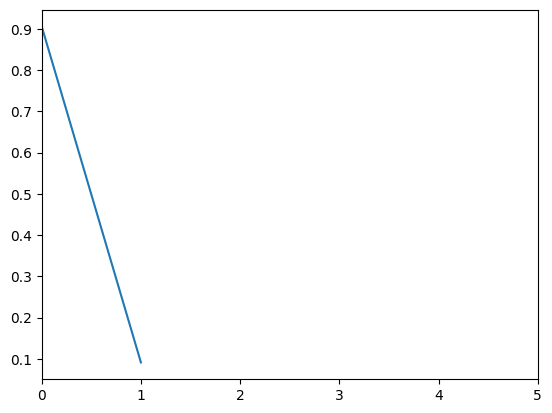

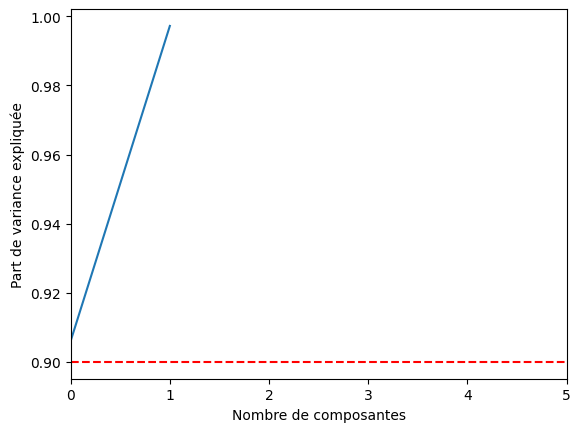

In [ ]:
plt.figure()

plt.xlim(0,5)
plt.plot(pca.explained_variance_ratio_)


plt.figure()
plt.xlim(0,5)
plt.xlabel('Nombre de composantes')
plt.ylabel('Part de variance expliquée')
plt.axhline(y=.9, color='r', linestyle='--')
plt.plot(pca.explained_variance_ratio_.cumsum())

In [ ]:
%%time
rfc_pca = RandomForestClassifier(n_estimators=200, criterion='entropy', n_jobs=-1, random_state=42)
rfc_pca.fit(X_train_pca, y_train_pca)

rfc_pca_pred = rfc_pca.predict(X_test_pca)
print(classification_report(y_test_pca, rfc_pca_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00    150043
           B       0.92      0.95      0.93    249256
           C       0.95      0.93      0.94    471541
           D       0.92      0.92      0.92    223403
           E       0.95      0.94      0.94    113519
           F       0.96      0.97      0.96     43608
           G       0.98      0.96      0.97     12845

    accuracy                           0.94   1264215
   macro avg       0.95      0.95      0.95   1264215
weighted avg       0.94      0.94      0.94   1264215

CPU times: user 30min 38s, sys: 32.4 s, total: 31min 11s
Wall time: 2min 25s


## **Modèle d'ensemble: XGBoost**

Nous allons maintenant voir un modèle de gradient boosting avec XGBoost, la librairie la plus populaire.  
Les algorithmes XGBoost montrent généralement de très bonnes performances sur des problèmes de classification multi-classe.    
Ces algorithmes sont basés sur des ensembles d'arbres de décisions, dans le boosting, chaque arbre de décision tente de corriger les erreurs de l'arbre précédent.

#### **Le modèle XGBoostClassifier**
C'est l'algorithme propre à la classification.
Il ne nécessite pas de créer une XDmatrix, nous devons en revanche encoder les classes de la cible en integers.  


Nous lui demandons:
- De générer itérativement 400 arbres de décision
- De tenir compte de nos 7 classes possibles pour la cible
- De s'arrêter si aucune amélioration n'est obsevée sur 20 itérations consécutives
- D'évaluer la performance sur les moyennes d'erreurs et log-loss (divergences entre les probabilités prédites et les classes réelles)

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


encoder = LabelEncoder()
target_enc = encoder.fit_transform(target)

X_x, X_valid_x, y_x, y_valid_x = train_test_split(data, target_enc, test_size=.1)
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(X_x, y_x, test_size=.2, random_state=42)



In [ ]:
%%time

xgb_clf = xgb.XGBClassifier(objective='multi:softmax',
                            n_estimators=400,
                            num_class=7,
                            early_stopping_rounds=20,
                            eval_metric=['merror','mlogloss'],
                            seed=42,
                            verbosity=2)



CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 34.8 µs


In [ ]:
%%time
xgb_clf.fit(X_train_x, y_train_x, eval_set=[(X_train_x, y_train_x), (X_test_x, y_test_x)])

[0]	validation_0-merror:0.20248	validation_0-mlogloss:1.35783	validation_1-merror:0.20288	validation_1-mlogloss:1.35828
[1]	validation_0-merror:0.18013	validation_0-mlogloss:1.09121	validation_1-merror:0.18011	validation_1-mlogloss:1.09159
[2]	validation_0-merror:0.17839	validation_0-mlogloss:0.92392	validation_1-merror:0.17820	validation_1-mlogloss:0.92425
[3]	validation_0-merror:0.17120	validation_0-mlogloss:0.80583	validation_1-merror:0.17099	validation_1-mlogloss:0.80608
[4]	validation_0-merror:0.16844	validation_0-mlogloss:0.71652	validation_1-merror:0.16833	validation_1-mlogloss:0.71670
[5]	validation_0-merror:0.16220	validation_0-mlogloss:0.64395	validation_1-merror:0.16211	validation_1-mlogloss:0.64416
[6]	validation_0-merror:0.15805	validation_0-mlogloss:0.59204	validation_1-merror:0.15792	validation_1-mlogloss:0.59227
[7]	validation_0-merror:0.15656	validation_0-mlogloss:0.54717	validation_1-merror:0.15645	validation_1-mlogloss:0.54737
[8]	validation_0-merror:0.15218	validati

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_class=7, num_parallel_tree=None, ...)

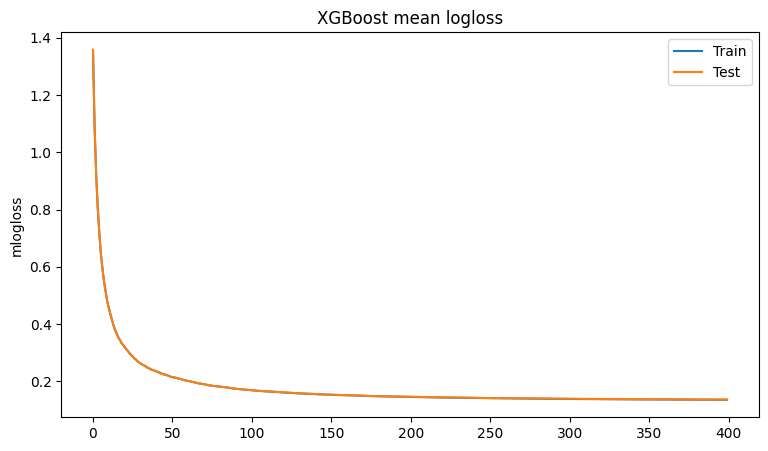

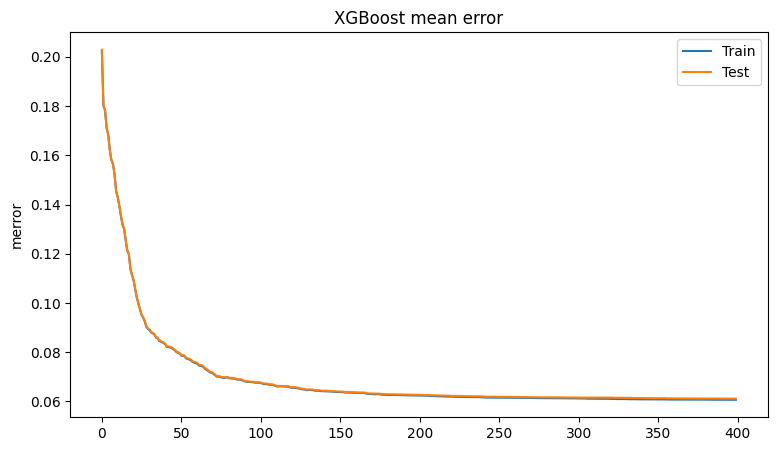

In [ ]:
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('XGBoost mean logloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('XGBoost mean error')
plt.show()

Le gain en performances est considérable pour les 30 premières itérations, puis diminue de moitié avant d'atteindre l'itération 200.  
Les performances atteignent ensuite un plateau, il ne semble pas pertinent de procéder à plus de 400 itérations.  

Les performances de classification sont sensiblement les mêmes qu'avec un Random Forest. En revanche l'algorithme de boosting promet un modèle encore plus robuste.

In [ ]:
from sklearn.metrics import classification_report
xgb_pred = xgb_clf.predict(X_test_x)
print(classification_report(y_test_x, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    135261
           1       0.91      0.95      0.93    223970
           2       0.94      0.93      0.93    423905
           3       0.91      0.92      0.91    201958
           4       0.95      0.93      0.94    101761
           5       0.95      0.96      0.96     39171
           6       0.96      0.95      0.96     11768

    accuracy                           0.94   1137794
   macro avg       0.95      0.95      0.95   1137794
weighted avg       0.94      0.94      0.94   1137794



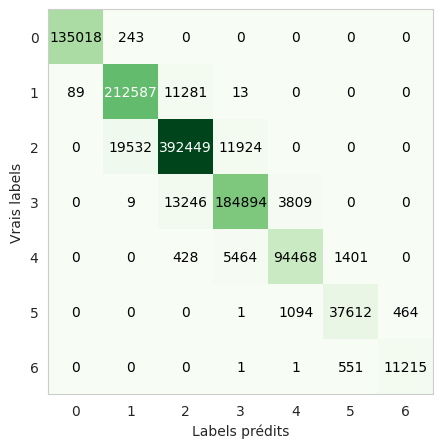

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
csn_matrix = confusion_matrix(y_test_x, xgb_pred)


classes = range(0, 10)
plt.figure(figsize=(5,5))

sns.set_style("whitegrid", {"axes.grid": False})
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, labels=classes)
plt.yticks(tick_marks, labels=classes)
img = plt.imshow(csn_matrix, cmap='Greens', interpolation='nearest')
for i, j in itertools.product(range(csn_matrix.shape[0]), range(csn_matrix.shape[1])):
    plt.text(j, i, csn_matrix[i,j],
    horizontalalignment='center',
    verticalalignment='center',
    color='white' if csn_matrix[i,j] > csn_matrix.max() / 2 else 'black')

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Voici le cheminement logique de référence de ce modèle de boosting

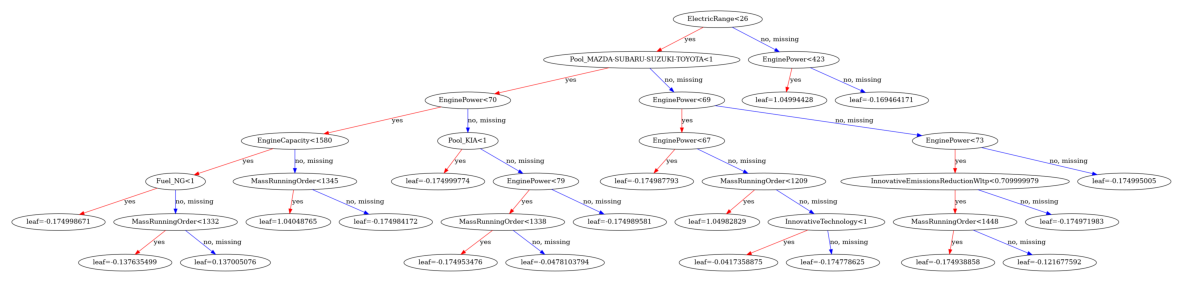

In [ ]:
plt.rcParams['figure.figsize'] = 15, 20
xgb.plot_tree(xgb_clf, fig_size=(16,16))
plt.show()

<Figure size 700x500 with 0 Axes>

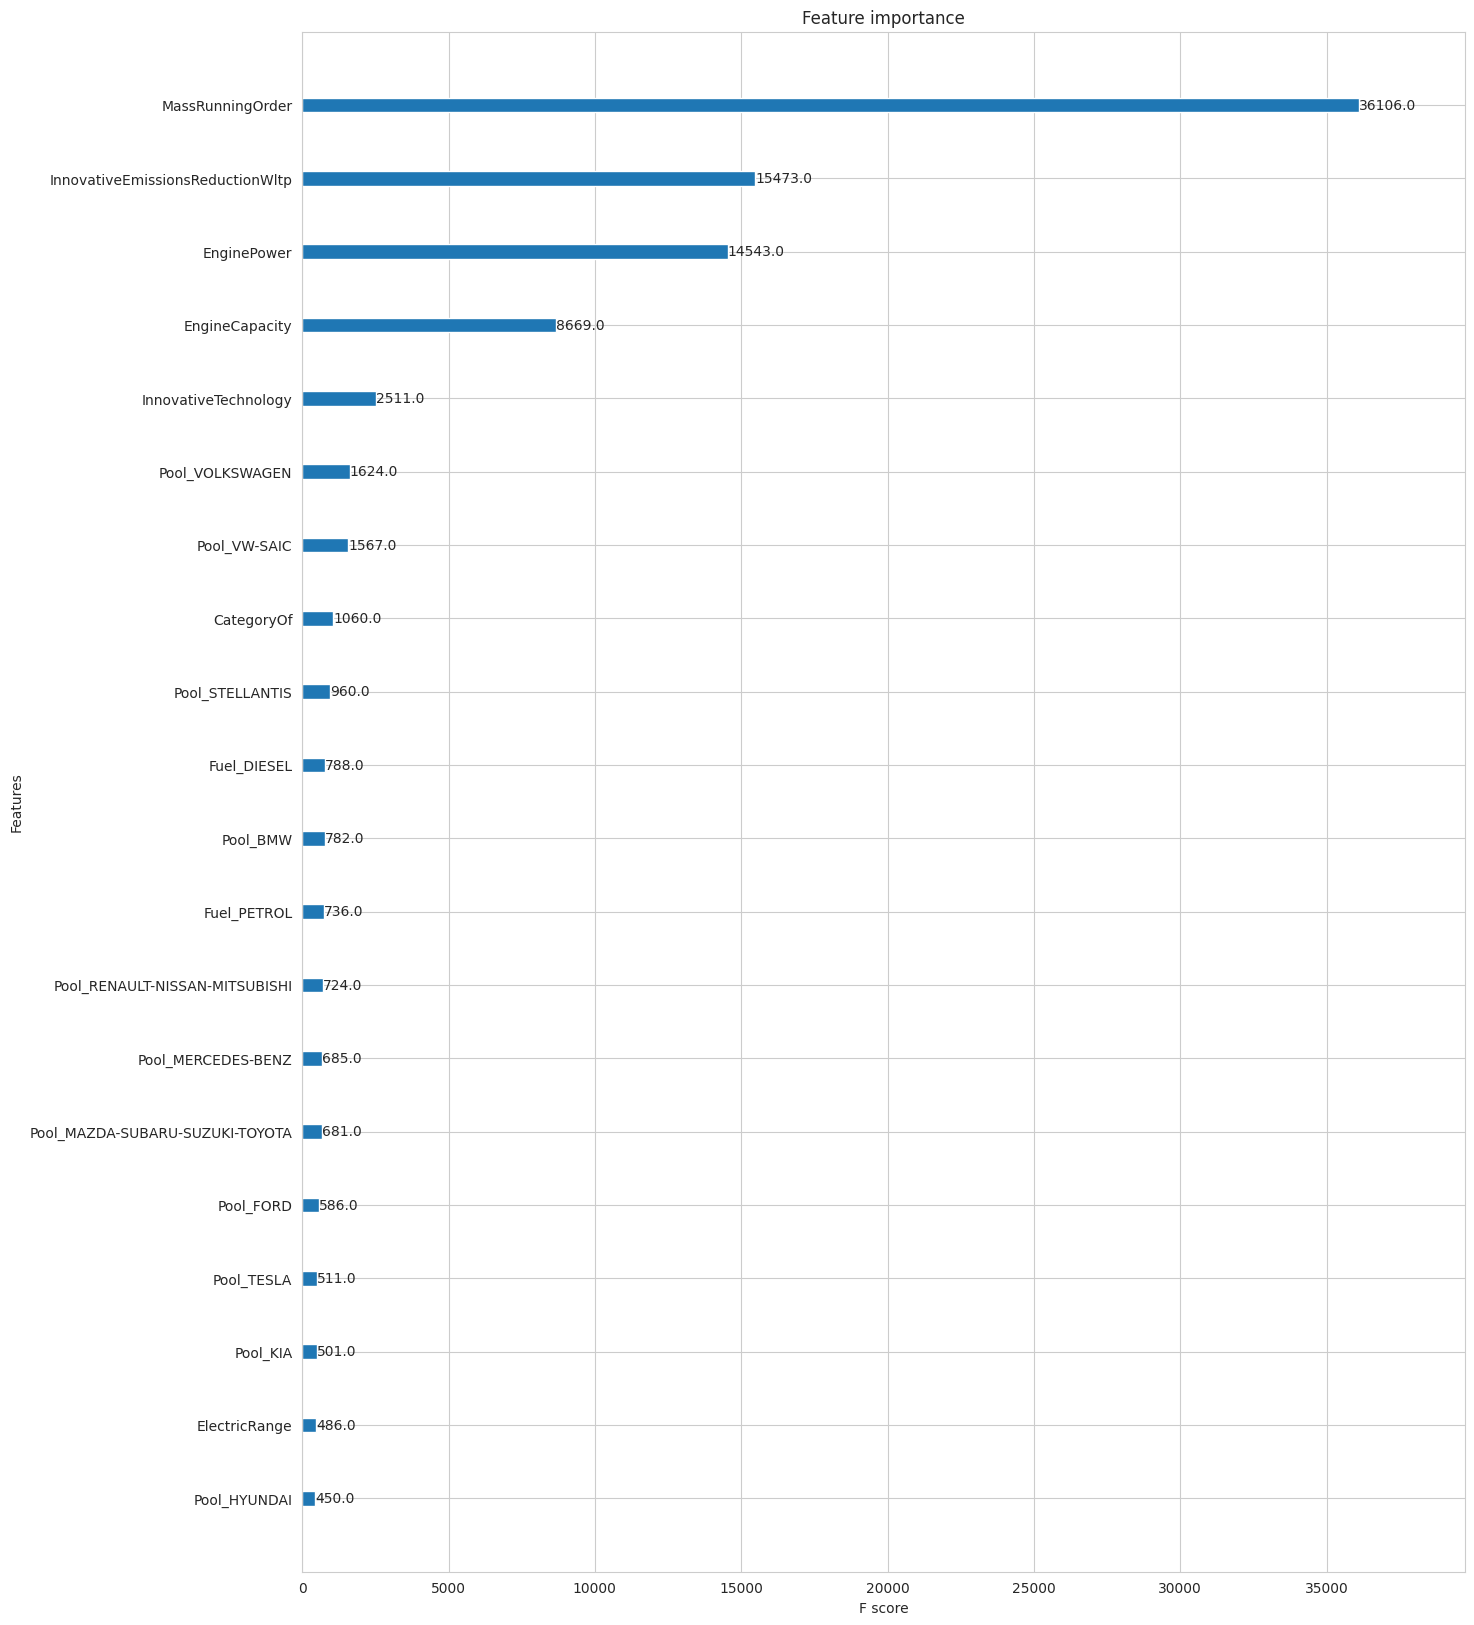

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
xgb.plot_importance(xgb_clf, max_num_features=20)
plt.show()

#### **Performances du modèle XGBoostClassifier sur le jeu de validation**

In [ ]:
xgb_valid_pred = xgb_clf.predict(X_valid_x)

# Display classification report
report = classification_report(y_valid_x, xgb_valid_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     75104
           1       0.91      0.95      0.93    124444
           2       0.94      0.93      0.93    235862
           3       0.92      0.92      0.92    111732
           4       0.95      0.93      0.94     56998
           5       0.95      0.96      0.95     21551
           6       0.96      0.95      0.95      6417

    accuracy                           0.94    632108
   macro avg       0.95      0.95      0.95    632108
weighted avg       0.94      0.94      0.94    632108



### **XGBoost2**

In [ ]:
%%time
train = xgb.DMatrix(data=X_train_x, label=y_train_x)
test = xgb.DMatrix(data=X_test_x, label=y_test_x)
valid = xgb.DMatrix(data=X_valid_x, label=y_valid_x)

params = {'booster': 'gbtree', 'learning_rate': 0.01, 'objective': 'multi:softmax', 'eval_metric': 'mlogloss', 'num_class': 7}
xgb2 = xgb.train(params=params, dtrain=train, num_boost_round=400, early_stopping_rounds=10, evals=[(train, 'train'), (test, 'eval')])


[0]	train-mlogloss:1.92419	eval-mlogloss:1.92420
[1]	train-mlogloss:1.90314	eval-mlogloss:1.90315
[2]	train-mlogloss:1.88262	eval-mlogloss:1.88264
[3]	train-mlogloss:1.86268	eval-mlogloss:1.86269
[4]	train-mlogloss:1.84328	eval-mlogloss:1.84330
[5]	train-mlogloss:1.82434	eval-mlogloss:1.82436
[6]	train-mlogloss:1.80590	eval-mlogloss:1.80593
[7]	train-mlogloss:1.78790	eval-mlogloss:1.78793
[8]	train-mlogloss:1.77037	eval-mlogloss:1.77041
[9]	train-mlogloss:1.75292	eval-mlogloss:1.75296
[10]	train-mlogloss:1.73590	eval-mlogloss:1.73595
[11]	train-mlogloss:1.71961	eval-mlogloss:1.71967
[12]	train-mlogloss:1.70370	eval-mlogloss:1.70375
[13]	train-mlogloss:1.68810	eval-mlogloss:1.68816
[14]	train-mlogloss:1.67286	eval-mlogloss:1.67293
[15]	train-mlogloss:1.65777	eval-mlogloss:1.65784
[16]	train-mlogloss:1.64306	eval-mlogloss:1.64314
[17]	train-mlogloss:1.62854	eval-mlogloss:1.62863
[18]	train-mlogloss:1.61443	eval-mlogloss:1.61452
[19]	train-mlogloss:1.60030	eval-mlogloss:1.60040
[20]	train

In [ ]:
y_pred2 = xgb2.predict(test)
print(classification_report(y_test_x, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    135307
           1       0.89      0.84      0.86    224199
           2       0.83      0.91      0.87    424544
           3       0.84      0.72      0.78    201547
           4       0.85      0.87      0.86    101859
           5       0.92      0.88      0.90     38890
           6       0.95      0.92      0.93     11448

    accuracy                           0.87   1137794
   macro avg       0.90      0.88      0.89   1137794
weighted avg       0.87      0.87      0.87   1137794



In [ ]:
preds = xgb2.predict(test)
xgbpreds = pd.Series(np.where(preds > .5, 1, 0))

display(pd.crosstab(y_test_x, y_pred2, rownames=['Classes Réelles'], colnames=['Classes Prédites']))


Classes Prédites,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Classes Réelles,,,,,,,
0,135121,186,0,0,0,0,0
1,467,187802,35613,317,0,0,0
2,0,22346,385962,15911,325,0,0
3,0,42,44014,145651,11839,1,0
4,0,12,195,11195,88575,1882,0
5,0,0,0,0,3983,34326,581
6,0,0,0,0,8,916,10524


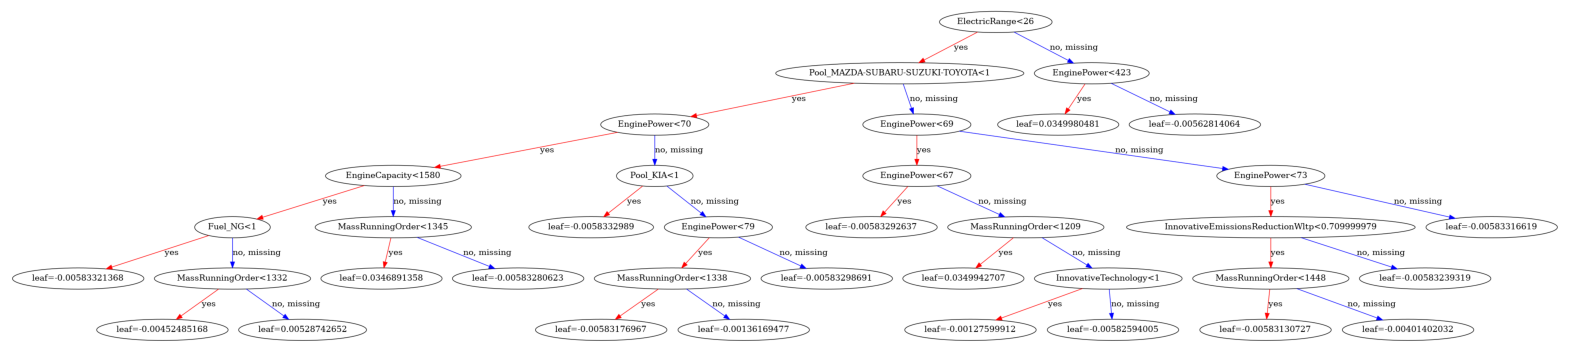

In [ ]:

from matplotlib.pylab import rcParams

#rcParams['figure.figsize'] = 20,20
xgb.plot_tree(xgb2, fig_size=(16,16))
plt.show()

## **Interprétation des modèles d'ensemble**

A l'aide de SHAP, nous allons maitnenant étudier l'interprétabilité de notre modèle xgb

In [ ]:
%%time
shap_sample = X_test_x.sample(10000, random_state=42)
explainer = shap.Explainer(xgb_clf.predict, shap_sample)
# Calculates the SHAP values - It takes some time
shap_values = explainer(shap_sample)

PermutationExplainer explainer: 10001it [16:06, 10.24it/s]                          


CPU times: user 4h 4min 34s, sys: 16.5 s, total: 4h 4min 51s
Wall time: 16min 6s


In [ ]:
%pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.0 MB/s eta 0:00:00


In [ ]:
import pickle
import shap

'''
with open('explainer.pkl', 'wb') as explainer_file:
    pickle.dump(explainer, explainer_file)

with open('shap_values.pkl', 'wb') as shap_values_file:
    pickle.dump(shap_values, shap_values_file)

'''
with open('/content/gdrive/My Drive/ROOT/Dataset/explainer.pkl', 'rb') as explainer_file:
    explainer = pickle.load(explainer_file)

with open('/content/gdrive/My Drive/ROOT/Dataset/shap_values.pkl', 'rb') as shap_values_file:
    shap_values = pickle.load(shap_values_file)




TypeError: ignored

In [ ]:
with open('/content/gdrive/My Drive/ROOT/Dataset/xgb_clf.pkl', 'rb') as model_file:
    xgb_clf = pickle.load(model_file)

# Load explainer
explainer_df = pd.read_csv('/content/gdrive/My Drive/ROOT/Dataset/explainer.csv')
feature_names = explainer_df['feature'].tolist()

# Use TreeExplainer for XGBoost models
explainer = shap.TreeExplainer(xgb_clf)

# Load shap_values
shap_values_df = pd.read_csv('/content/gdrive/My Drive/ROOT/Dataset/shap_values.csv')
shap_values = shap_values_df.values

# Ensure shap_values_df only contains numeric values
shap_values_df = shap_values_df.apply(pd.to_numeric, errors='coerce')

# Plot summary
shap.summary_plot(shap_values, features=shap_values_df, feature_names=feature_names)


[11:16:09] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


TypeError: ignored

In [ ]:
shap.summary_plot(shap_values, features=shap_values_df, feature_names=feature_names)

TypeError: ignored

In [ ]:

print(shap.__version__)

0.43.0


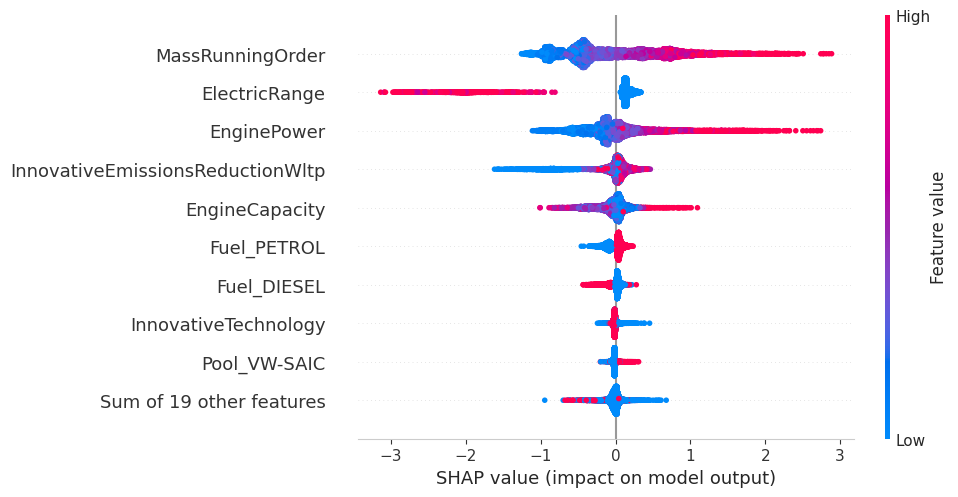

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
dd

TypeError: ignored

In [ ]:
shap.plots.force(explainer.expected_value[0], shap_values[0])

TypeError: ignored

In [ ]:
shap.plots.force(shap_values[-1])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0:300])


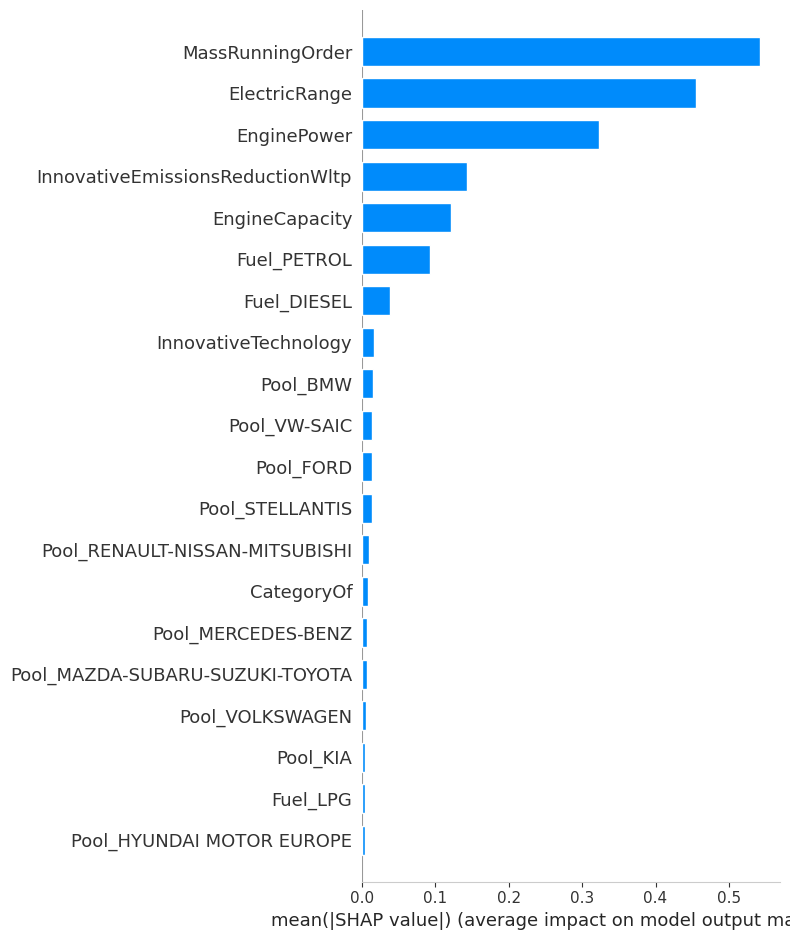

In [ ]:
shap.summary_plot(shap_values, X_test_x, plot_type='bar', feature_names=X_test_x.columns)